# Proyek Klasifikasi Bunga

## Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import Callback, EarlyStopping

from matplotlib import pyplot as plt

import zipfile
import pickle

2025-04-12 12:39:36.370129: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744461576.579331      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744461576.634591      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Data Preparation

### **Moving Data**

In [2]:
!gdown 1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_

Downloading...
From (original): https://drive.google.com/uc?id=1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_
From (redirected): https://drive.google.com/uc?id=1X8AiHCFOJ6B8Qw0LA9mzODqUj1S0u7P_&confirm=t&uuid=47239d78-01a5-4141-8b38-bbcdf5a26e84
To: /kaggle/working/model-datasets-2.zip
100%|████████████████████████████████████████| 292M/292M [00:03<00:00, 92.2MB/s]


In [3]:
!mkdir model-datasets

In [4]:
zipfile.ZipFile('model-datasets-2.zip', 'r').extractall('model-datasets')

In [5]:
!rm model-datasets-2.zip

### **Data Loading**

In [6]:
train_gen = ImageDataGenerator(
    rescale            = 1/255,
    rotation_range     = 0.15,
    zoom_range         = 0.15,
    shear_range        = 0.15,
    horizontal_flip    = True,
    width_shift_range  = 0.15,
    height_shift_range = 0.15
)

test_gen = ImageDataGenerator(rescale=1/255)

In [7]:
dims = [224, 224]

In [8]:
train_set = train_gen.flow_from_directory(
    directory   = 'model-datasets/train',
    target_size = dims,
    batch_size  = 32,
)

validation_set = test_gen.flow_from_directory(
    directory   = 'model-datasets/validation',
    target_size = dims,
    batch_size  = 32,
)

test_set = test_gen.flow_from_directory(
    directory   = 'model-datasets/test',
    target_size = dims,
    batch_size  = 32,
)

Found 11497 images belonging to 37 classes.
Found 1440 images belonging to 37 classes.
Found 1433 images belonging to 37 classes.


## Modeling

### **Model**

In [9]:
model = models.Sequential([
    layers.InputLayer(shape=[*dims, 3]),
    layers.BatchNormalization(),

    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.55),
    layers.Dense(37, activation='softmax')
])

I0000 00:00:1744461603.412203      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 10, 10, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 5, 5, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,277,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 37)                  │           9,509 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,855,153 (18.52 MB)

 Trainable params: 4,855,147 (18.52 MB)

 Non-trainable params: 6 (24.00 B)

In [11]:
model.compile(
    optimizer = 'adam',
    loss      = 'categorical_crossentropy',
    metrics   = ['accuracy']
)

### **Callbacks**

In [12]:
accuracy_min = 0.9
class CallbackStop(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > accuracy_min:
            print(f'\n✅ Akurasi telah mencapai {accuracy_min}')
            self.model.stop_training = True

callback_stop  = CallbackStop()
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True, mode='max')

### **Training**

In [13]:
history = model.fit(train_set, epochs=200, callbacks=[callback_stop, early_stopping], validation_data=validation_set)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744461611.710072      83 service.cc:148] XLA service 0x7bf30c011d30 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744461611.710782      83 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744461612.245228      83 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/360 ━━━━━━━━━━━━━━━━━━━━ 1:14:46 12s/step - accuracy: 0.0625 - loss: 3.5870

I0000 00:00:1744461617.981250      83 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


360/360 ━━━━━━━━━━━━━━━━━━━━ 134s 338ms/step - accuracy: 0.0618 - loss: 3.4861 - val_accuracy: 0.2056 - val_loss: 2.8408
Epoch 2/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 119s 323ms/step - accuracy: 0.1806 - loss: 2.8621 - val_accuracy: 0.3382 - val_loss: 2.3245
Epoch 3/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 121s 329ms/step - accuracy: 0.2698 - loss: 2.5484 - val_accuracy: 0.3590 - val_loss: 2.2565
Epoch 4/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 323ms/step - accuracy: 0.3076 - loss: 2.3730 - val_accuracy: 0.4458 - val_loss: 1.9490
Epoch 5/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 321ms/step - accuracy: 0.3606 - loss: 2.1855 - val_accuracy: 0.4792 - val_loss: 1.7849
Epoch 6/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 118s 321ms/step - accuracy: 0.4018 - loss: 2.0699 - val_accuracy: 0.5132 - val_loss: 1.6933
Epoch 7/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 117s 320ms/step - accuracy: 0.4422 - loss: 1.9146 - val_accuracy: 0.5299 - val_loss: 1.6539
Epoch 8/200
360/360 ━━━━━━━━━━━━━━━━━━━━ 117s 318ms/step - accuracy: 0.4646 - los

## Saving

In [14]:
model.save('model.keras')
model.save('model.h5')

In [15]:
with open('history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

## Visualize

In [16]:
def visualize(name):
    plt.figure(figsize=[15, 5])
    plt.plot(history[name], label='train', marker='o')
    plt.plot(history[f'val_{name}'], label='val', marker='o')

    plt.title(name)
    plt.xlabel('epoch')
    plt.ylabel(name)

    plt.grid()
    plt.legend()
    plt.show()

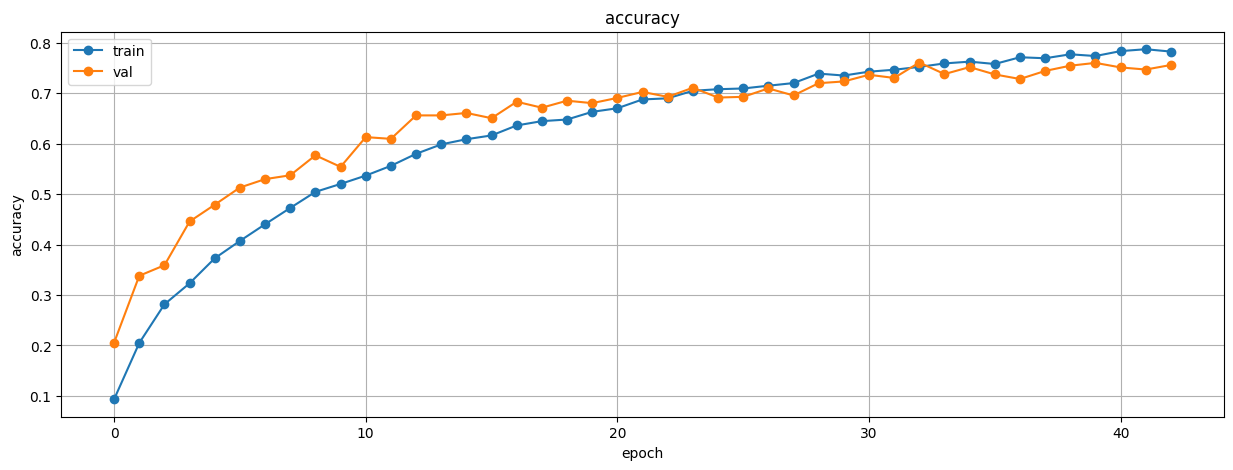

In [17]:
visualize('accuracy')

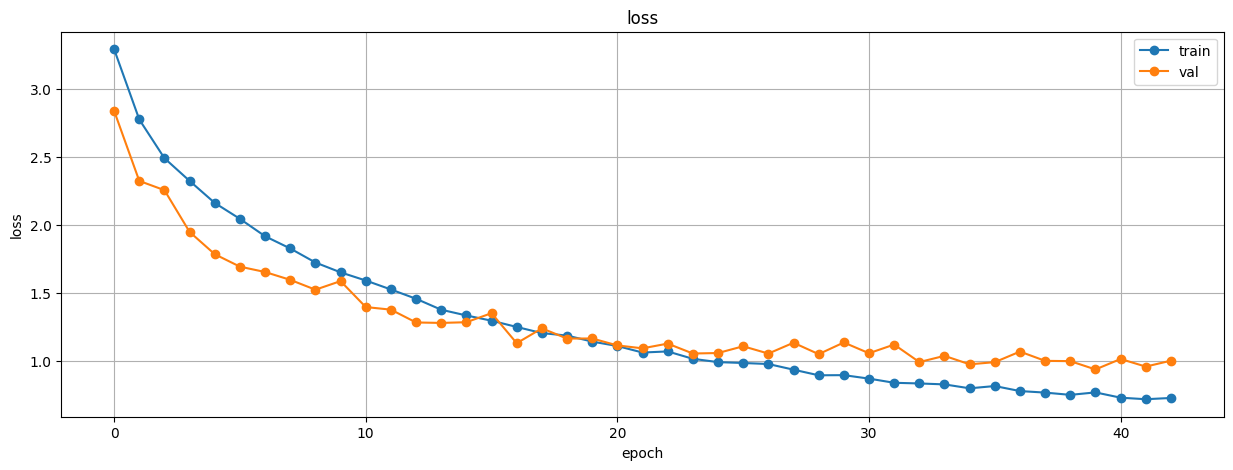

In [18]:
visualize('loss')